<a href="https://colab.research.google.com/github/pramod1997/submission_data_sciece/blob/master/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score , accuracy_score , confusion_matrix
from sklearn.metrics import roc_curve, auc


In [0]:
df = pd.read_csv('new_processed_data.csv')

In [3]:
df.head()

,CRIF.S1.Score,Payment.Amount,Interest.Paid,Principal.Advance.Paid,Total.years.of.experience.in.Employment.,Estimated.Interest,Debt.service.ratio,Salary.Income.current.month,Interest.Rate,Total.Amount.Paid,...,Education.Level,No.of.dependents,Loan.Amount,Contract.Date,Marital.status,Term,Residential.status,pymt_standing,Maturity.Date,Fee.Set
0,7.112594e-01,0.0,1.729864,1.364154,1.016878,1.104053,0.641180,0.161886,-1.352475,1.480821,...,1,2,1.403863,1.742273,1,0.797752,0,1,-0.020492,3
1,1.008791e-15,0.0,0.919827,1.256476,0.081937,-0.394244,0.580981,0.161886,-0.235248,1.194443,...,3,2,-0.362029,2.464853,1,-0.517696,0,1,-2.419212,5
2,1.008791e-15,0.0,0.392257,0.247584,-0.800805,-1.260407,0.811198,0.161886,-1.491055,0.282910,...,5,0,-0.899474,2.464853,0,-0.517696,1,0,-2.419212,3
3,1.008791e-15,0.0,1.887456,1.929014,0.081937,1.052157,-0.428102,0.161886,1.108193,1.988764,...,3,2,0.328972,2.284208,1,0.797752,1,2,-1.219852,7
4,1.008791e-15,0.0,1.257000,0.737145,1.163304,0.141975,0.846952,0.161886,-0.218997,0.878189,...,2,3,-0.362029,2.464853,1,0.797752,0,1,-1.219852,5


In [4]:
df.columns

Index(['CRIF.S1.Score', 'Payment.Amount', 'Interest.Paid',
       'Principal.Advance.Paid', 'Total.years.of.experience.in.Employment.',
       'Estimated.Interest', 'Debt.service.ratio',
       'Salary.Income.current.month', 'Interest.Rate', 'Total.Amount.Paid',
       'Principal.Advance.Remaining', 'Delinquent.Amount', 'Date.of.Birth',
       'Gender', 'Education.Level', 'No.of.dependents', 'Loan.Amount',
       'Contract.Date', 'Marital.status', 'Term', 'Residential.status',
       'pymt_standing', 'Maturity.Date', 'Fee.Set'],
      dtype='object')

In [0]:
### drop columns with target value --> 2 
df.drop(df[df['pymt_standing']==2].index , inplace = True)

In [0]:
feature = [x for x in df.columns if x not in ['pymt_standing']]
Y = df['pymt_standing']
X = df[feature]

In [0]:
## split in train_test validation 
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.2)


In [0]:

param_grid = {
    'n_neighbors' : [x for x in range(1,25)]
      
    }
clf = GridSearchCV(KNeighborsClassifier(), param_grid ,cv =5)

  
  

In [9]:
clf.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [10]:
clf.best_params_

{'n_neighbors': 2}

In [11]:
### finally selecting k =10 
model = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=None, n_neighbors=2, p=2, weights='uniform')
model.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [12]:
# train accuracy
prediction = model.predict(X_train)
confusion_matrix(Y_train,prediction)

array([[ 247,    0],
       [   1, 1207]])

In [13]:
# test accuracy
prediction = model.predict(X_test)
confusion_matrix(Y_test,prediction)

array([[ 58,   0],
       [  0, 306]])

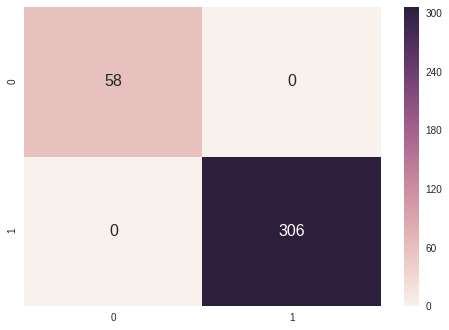

In [14]:
##plotting confusion matrix 
array = confusion_matrix(Y_test,prediction)
df_cm = pd.DataFrame(array, [0,1],
                  [0,1])
#plt.figure(figsize = (10,7))
plt.xlabel('Predicted')
plt.ylabel('Actual Label')
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16} ,fmt='g')# font size

In [15]:
score = accuracy_score(Y_test,prediction)
score

1.0

In [16]:
### roc_auc_score  ---> it needs to improve 
prediction = model.predict_proba(X_test)
roc_score = roc_auc_score(Y_test,prediction[:,1])
roc_score

1.0

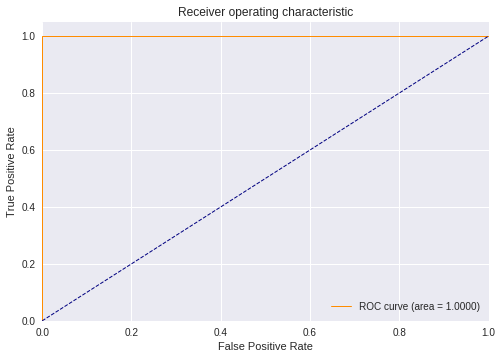

In [17]:
## plot roc curve
###  

target = Y_test
prediction = prediction[:,1]

fpr, tpr, thresholds = roc_curve( target,prediction)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [18]:
np.array(np.unique(Y_test, return_counts=True))

array([[  0,   1],
       [ 58, 306]])